In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
embs = np.load('../train/umap_face_bounty.npy')
labels = pd.read_csv("../train/labels.csv")

nonna_idx = labels["skin_tone"].notna().values
nonna_labels = labels[nonna_idx]
embs = embs[nonna_idx]

In [30]:
def map_to_int(col: pd.Series) -> pd.Series:
    return col.astype("category").cat.codes

CATS = ["age", "gender", "skin_tone"]
# map CATS to integers
for cat in CATS:
    nonna_labels[cat] = map_to_int(nonna_labels[cat])
    

C:\Users\jhr\AppData\Local\Temp\ipykernel_11872\2661150727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonna_labels[cat] = map_to_int(nonna_labels[cat])
C:\Users\jhr\AppData\Local\Temp\ipykernel_11872\2661150727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonna_labels[cat] = map_to_int(nonna_labels[cat])
C:\Users\jhr\AppData\Local\Temp\ipykernel_11872\2661150727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

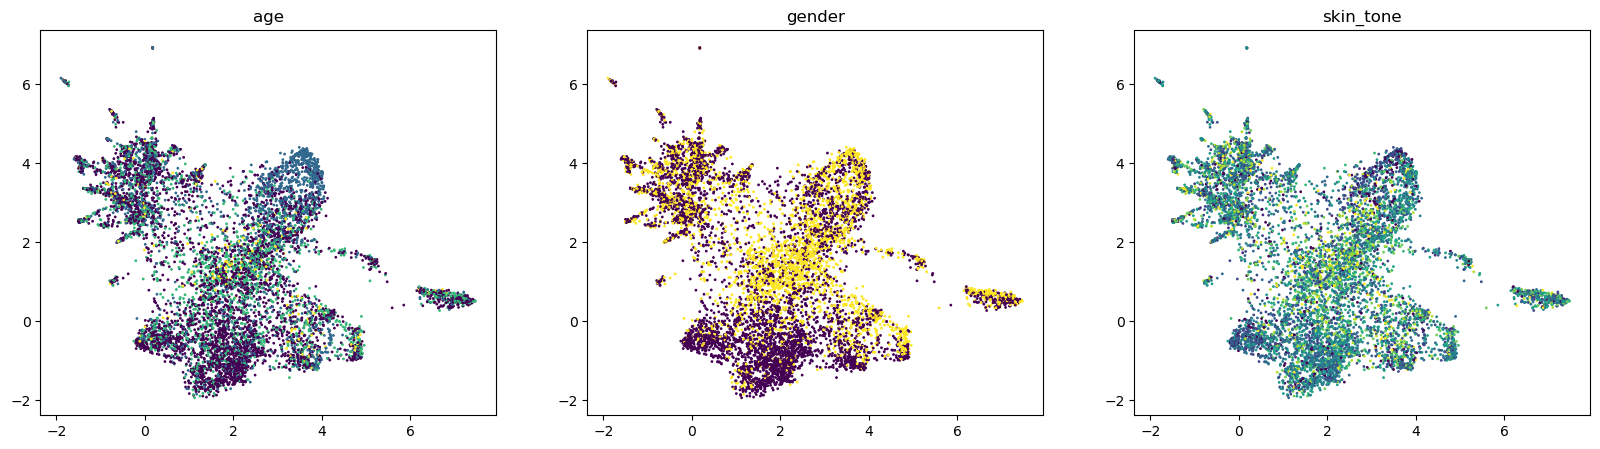

In [36]:
# plot embeddings colored by CATS
fig, axs = plt.subplots(1, len(CATS), figsize=(20, 5))
for i, cat in enumerate(CATS):
    axs[i].scatter(embs[:, 0], embs[:, 1], c=nonna_labels[cat], s=1)
    axs[i].set_title(cat)
plt.show()


In [37]:
from hdbscan import HDBSCAN

clusterer = HDBSCAN(min_cluster_size=1, min_samples=1)